# Day 08. Exercise 05
# Clustering

## 0. Imports

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [3]:
df = pd.read_csv('../data/regression.csv')
df.head()

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,-64.400000
1,user_10,20,89.0,-74.800000
2,user_14,61,143.0,-159.000000
3,user_17,51,47.0,-61.600000
4,user_18,5,3.0,-5.666667


In [4]:
df = df.drop(columns='pageviews')
df.head()

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [5]:
X = df[['num_commits', 'AVG(diff)']]

In [6]:
kmeans = KMeans(n_clusters=3, random_state=21)
kmeans.fit(X)
labels = kmeans.labels_
labels

array([0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 2, 1, 0, 1, 1], dtype=int32)

In [7]:
kmeans.cluster_centers_

array([[  30.92307692,  -41.92820513],
       [  37.1       , -152.075     ],
       [  89.33333333,  -94.5       ]])

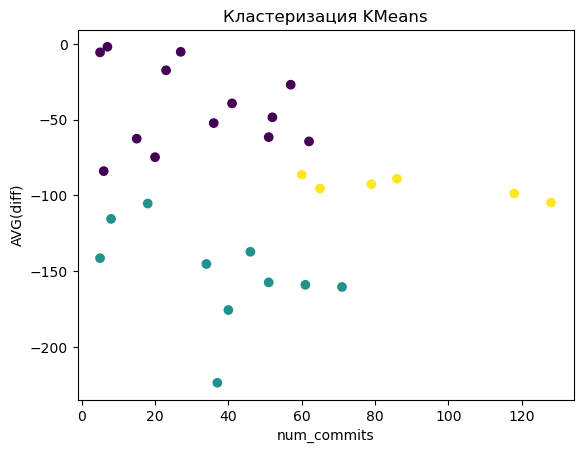

In [8]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.title('Кластеризация KMeans')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.show()

In [9]:
silhouette_score(X, labels)

0.4454402135233297

silhouette_score, cluster=2, score=0.41949205623774233
silhouette_score, cluster=3, score=0.4454402135233297
silhouette_score, cluster=4, score=0.41503879936268956
silhouette_score, cluster=5, score=0.3521030626149593
silhouette_score, cluster=6, score=0.3954350435152892
silhouette_score, cluster=7, score=0.39637476619843964


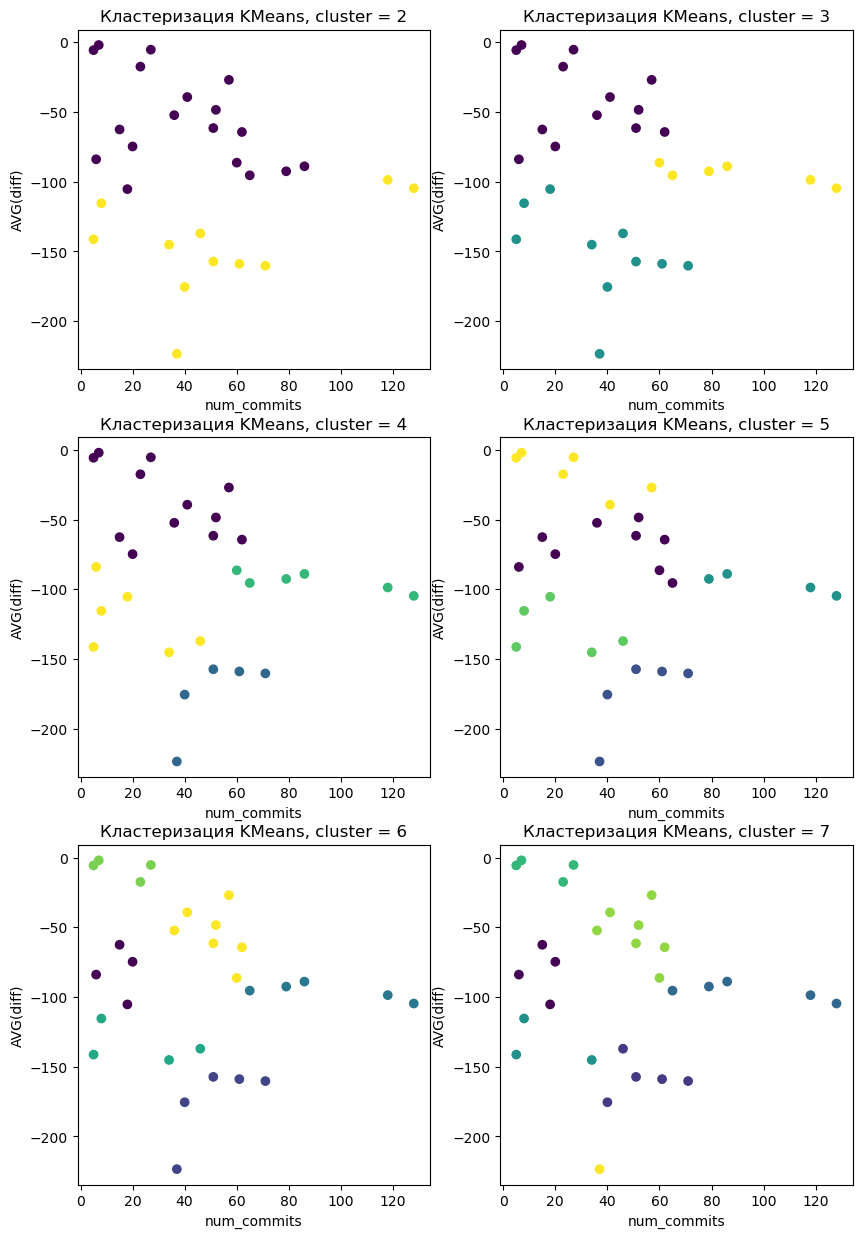

In [10]:
i = 1
plt.figure(figsize=(10, 15))

for cluster in range(2, 8):
    kmeans = KMeans(n_clusters=cluster, random_state=21).fit(X)
    labels = kmeans.labels_

    score = silhouette_score(X, labels)
    print(f'silhouette_score, cluster={cluster}, score={score}')

    plt.subplot(3, 2, i)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
    plt.title(f'Кластеризация KMeans, cluster = {cluster}')
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')
    
    i += 1

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [11]:
dbscan = DBSCAN(eps=20, min_samples=2).fit(X)
labels = dbscan.labels_

In [12]:
labels

array([ 0,  1,  2,  0,  3,  4,  5,  5,  5,  6,  7,  3,  5,  0,  8,  0,  7,
       -1, -1,  1, -1,  0,  8,  2,  4, -1,  1,  6,  2])

In [13]:
silhouette_score(X, labels)

0.38339641455696616

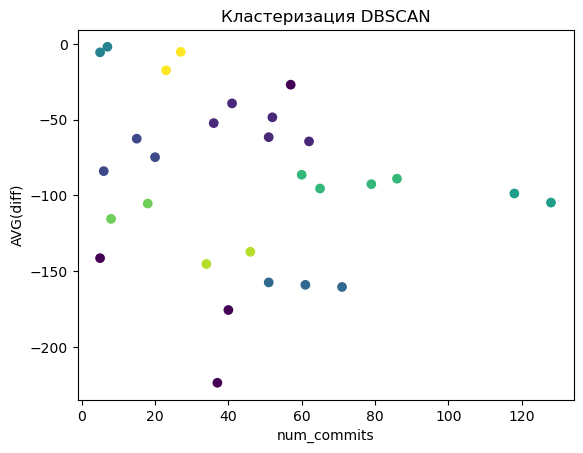

In [14]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.title('Кластеризация DBSCAN')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.show()

silhouette_score, point=2, score=0.38339641455696616
silhouette_score, point=3, score=0.046677004430482796
silhouette_score, point=4, score=-0.027327812753917446
silhouette_score, point=5, score=-0.00026946798331839824


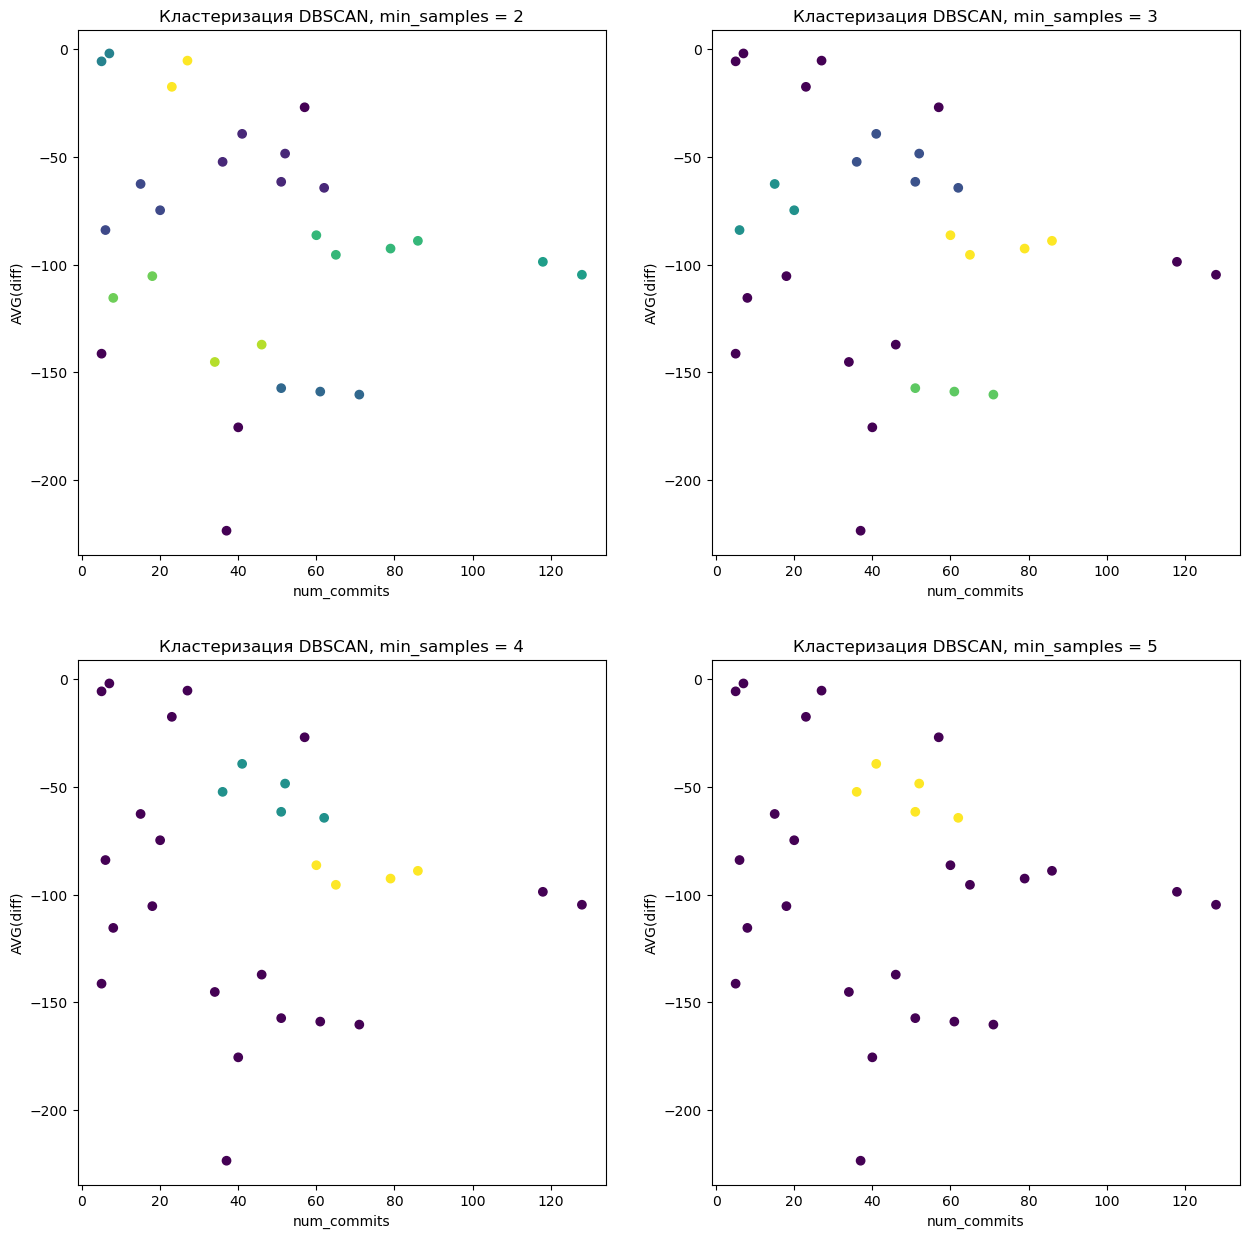

In [15]:
i = 1
plt.figure(figsize=(15, 15))

for point in range(2, 6):
    dbscan = DBSCAN(eps=20, min_samples=point).fit(X)
    labels = dbscan.labels_

    score = silhouette_score(X, labels)
    print(f'silhouette_score, point={point}, score={score}')

    plt.subplot(2, 2, i)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
    plt.title(f'Кластеризация DBSCAN, min_samples = {point}')
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')

    i += 1

silhouette_score, eps=10, score=-0.07923479818777454
silhouette_score, eps=15, score=0.3469844857581226
silhouette_score, eps=20, score=0.38339641455696616
silhouette_score, eps=25, score=0.34388947016930727


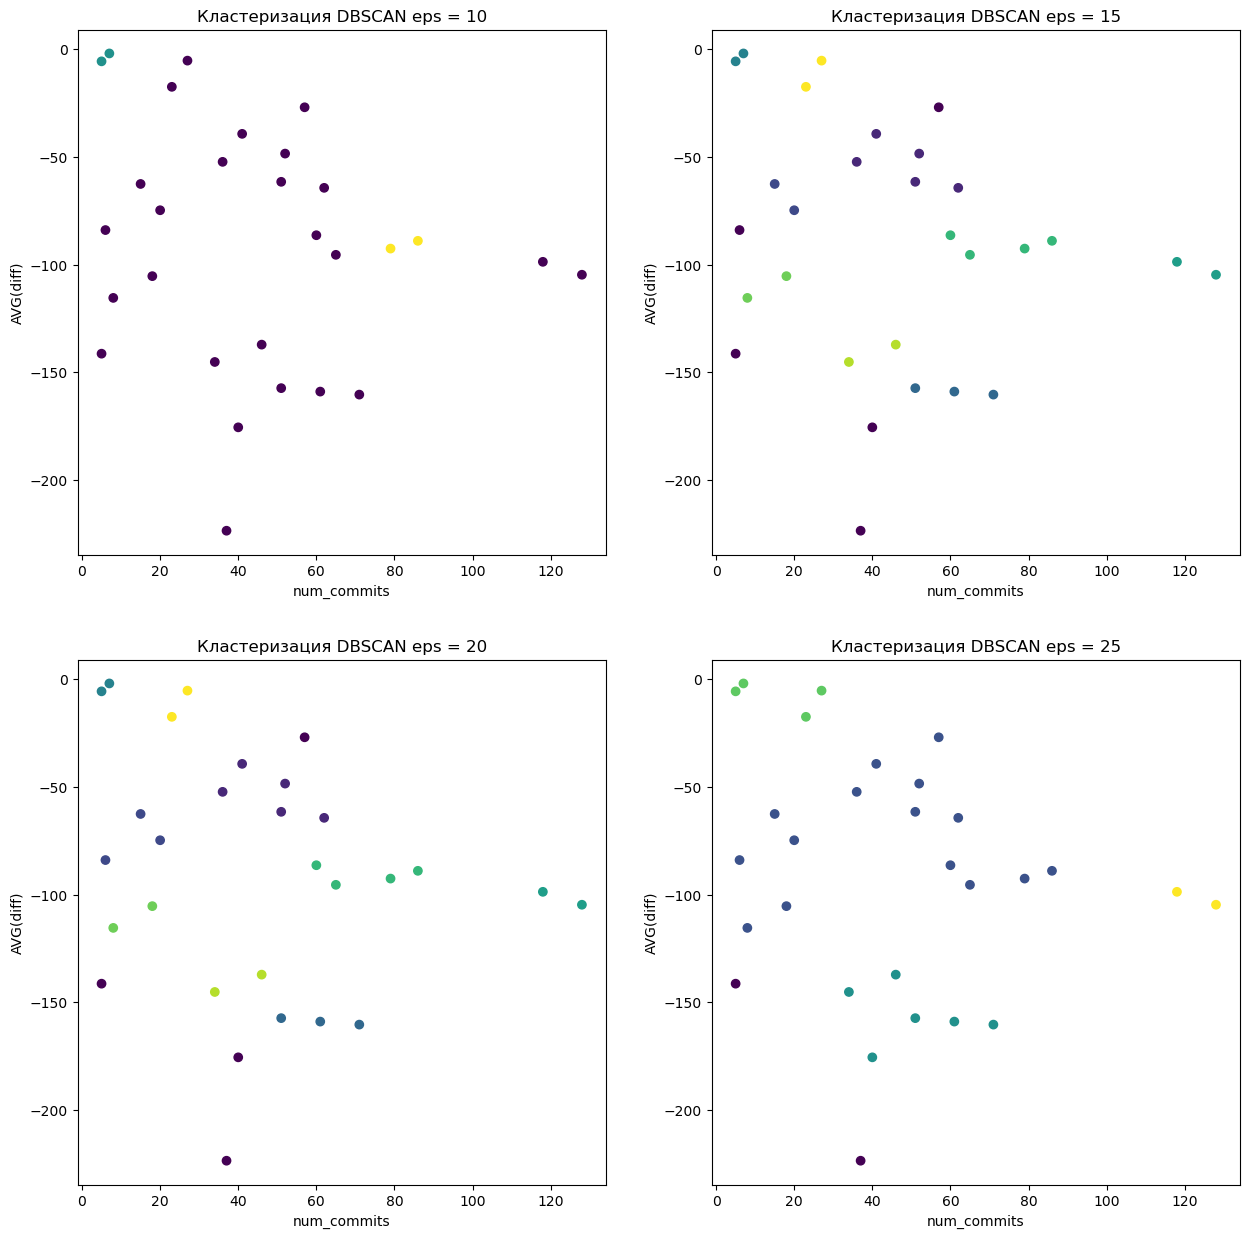

In [16]:
i = 1
plt.figure(figsize=(15, 15))

for eps in range(10, 30, 5):
    dbscan = DBSCAN(eps=eps, min_samples=2).fit(X)
    labels = dbscan.labels_

    score = silhouette_score(X, labels)
    print(f'silhouette_score, eps={eps}, score={score}')

    plt.subplot(2, 2, i)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
    plt.title(f'Кластеризация DBSCAN eps = {eps}')
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')

    i += 1

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [59]:
ac = AgglomerativeClustering(n_clusters=5).fit(X)
labels = ac.labels_

In [60]:
labels

array([2, 3, 0, 2, 4, 1, 1, 1, 1, 3, 0, 4, 1, 2, 4, 2, 0, 2, 3, 3, 0, 2,
       4, 0, 1, 0, 3, 3, 0])

In [61]:
silhouette_score(X, labels)

0.46383015199381467

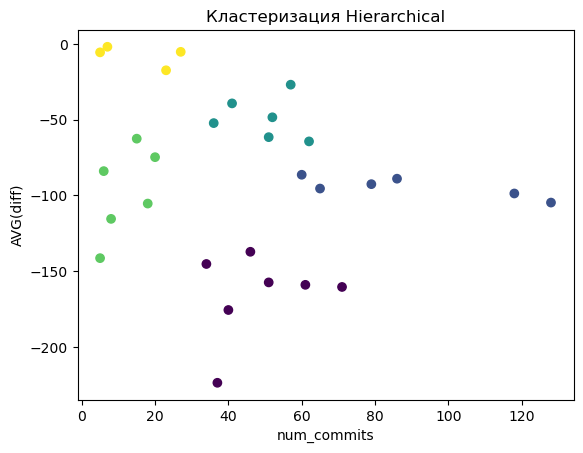

In [62]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.title('Кластеризация Hierarchical')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.show()

silhouette_score, n_clusters=2, score=0.35902490572221984
silhouette_score, n_clusters=3, score=0.3390493703444805
silhouette_score, n_clusters=4, score=0.4448362750283643
silhouette_score, n_clusters=5, score=0.46383015199381467
silhouette_score, n_clusters=6, score=0.4527145606287827
silhouette_score, n_clusters=7, score=0.4865808853184314
silhouette_score, n_clusters=8, score=0.50779855565622
silhouette_score, n_clusters=9, score=0.47576869039147557


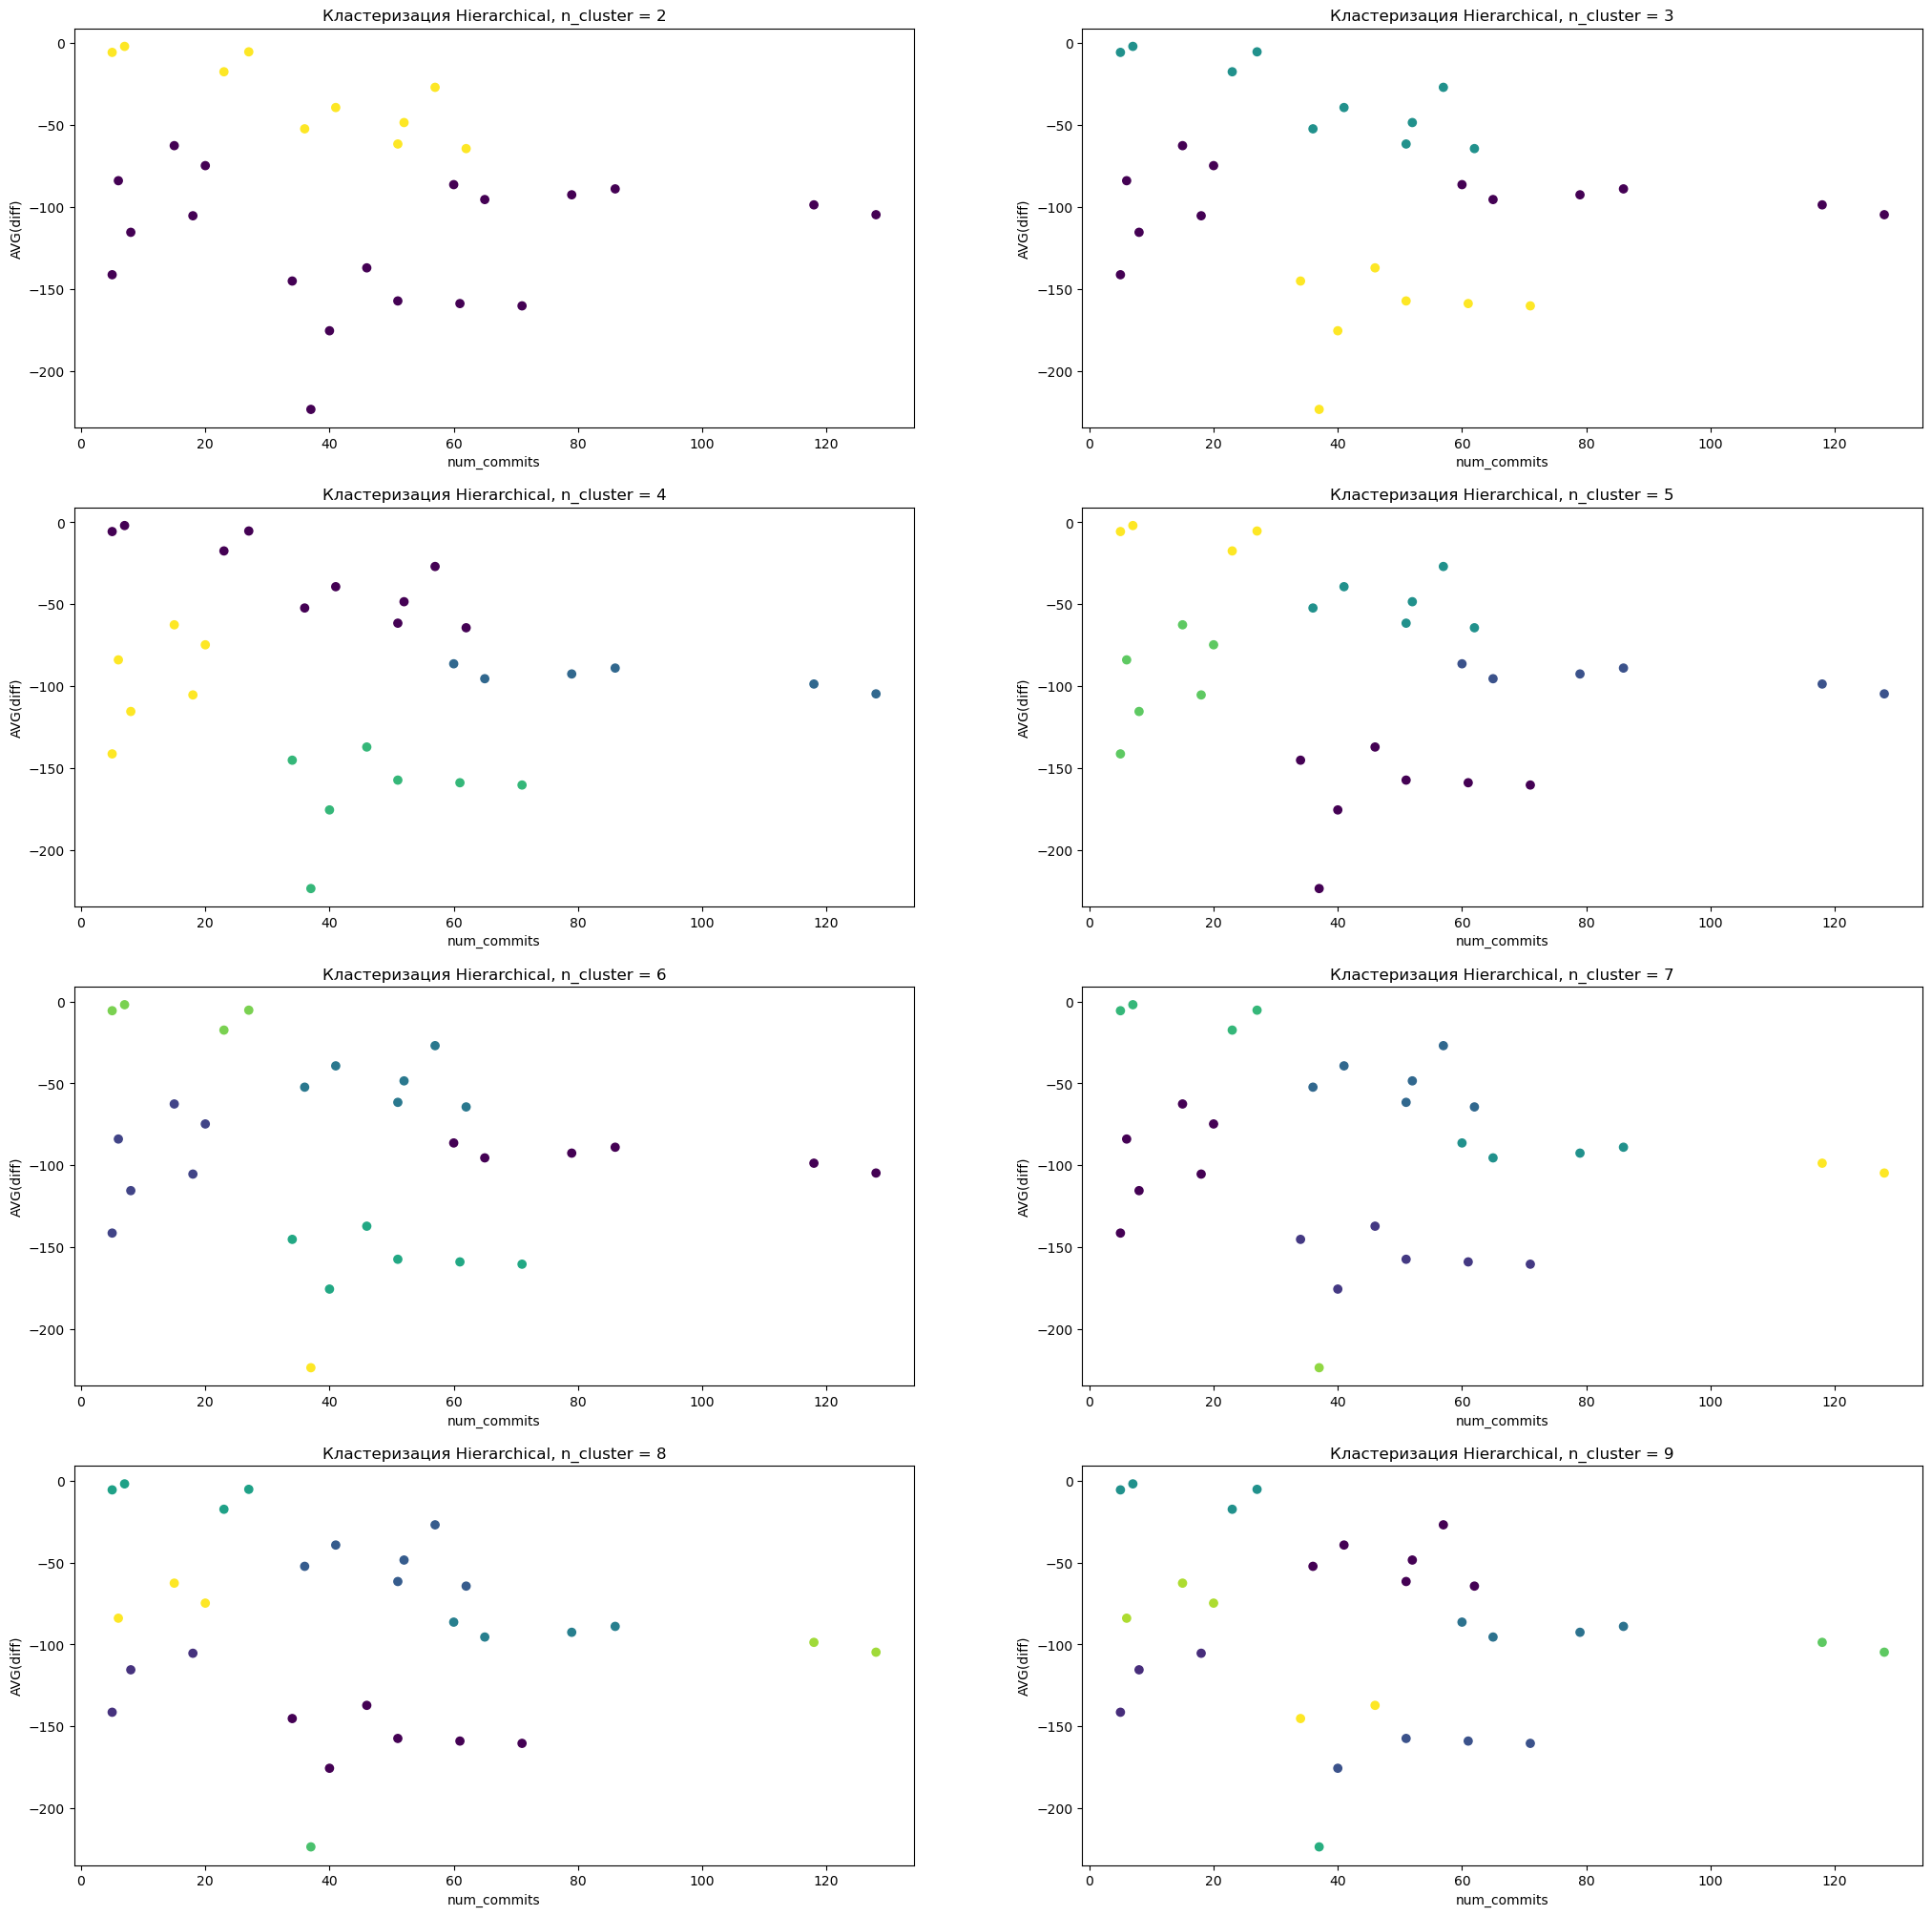

In [31]:
i = 1
plt.figure(figsize=(25, 25))

for cluster in range(2, 10):
    dbscan = AgglomerativeClustering(n_clusters=cluster).fit(X)
    labels = dbscan.labels_

    score = silhouette_score(X, labels)
    print(f'silhouette_score, n_clusters={cluster}, score={score}')

    plt.subplot(4, 2, i)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
    plt.title(f'Кластеризация Hierarchical, n_cluster = {cluster}')
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')

    i += 1

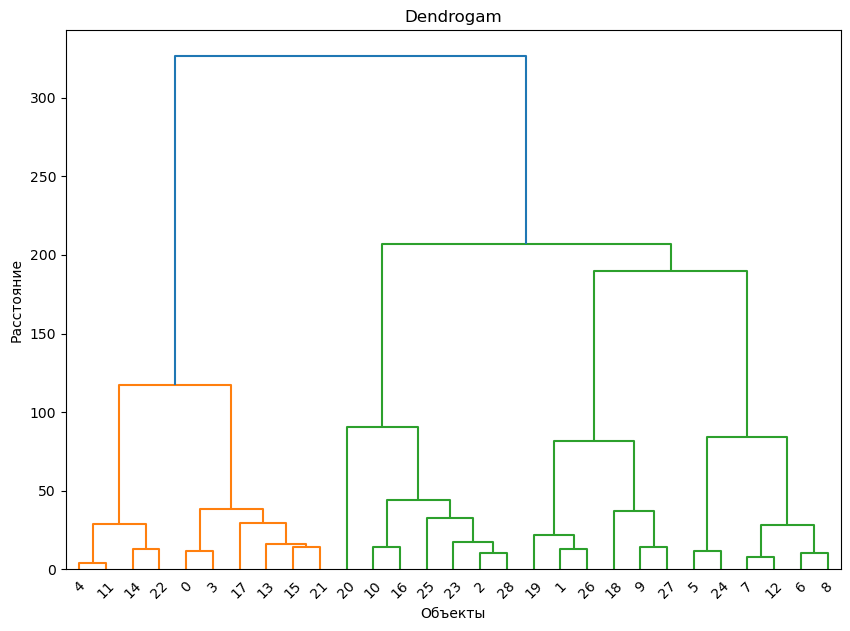

In [66]:
linked = linkage(X, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogam')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [86]:
def clustering_visualizes(data, model_class, param, param_name, param_range):
    scores = []
    best_score = -1
    best_value = 0
    best_labels = 0

    for value in param_range:
        param[param_name] = value
        model = model_class(**param)
        labels = model.fit_predict(data)

        score = silhouette_score(data, labels)
        scores.append(score)

        if score > best_score:
            best_score = score
            best_labels = labels
            best_value = value


    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    
    plt.plot(param_range, scores)
    plt.scatter(best_value, best_score, color='red')
    plt.title('Silhouette scores')

    plt.subplot(1, 2, 2)
    plt.scatter(data[:, 0], data[:, 1], c=best_labels)
    plt.title('Best clustering')
    
    plt.show()

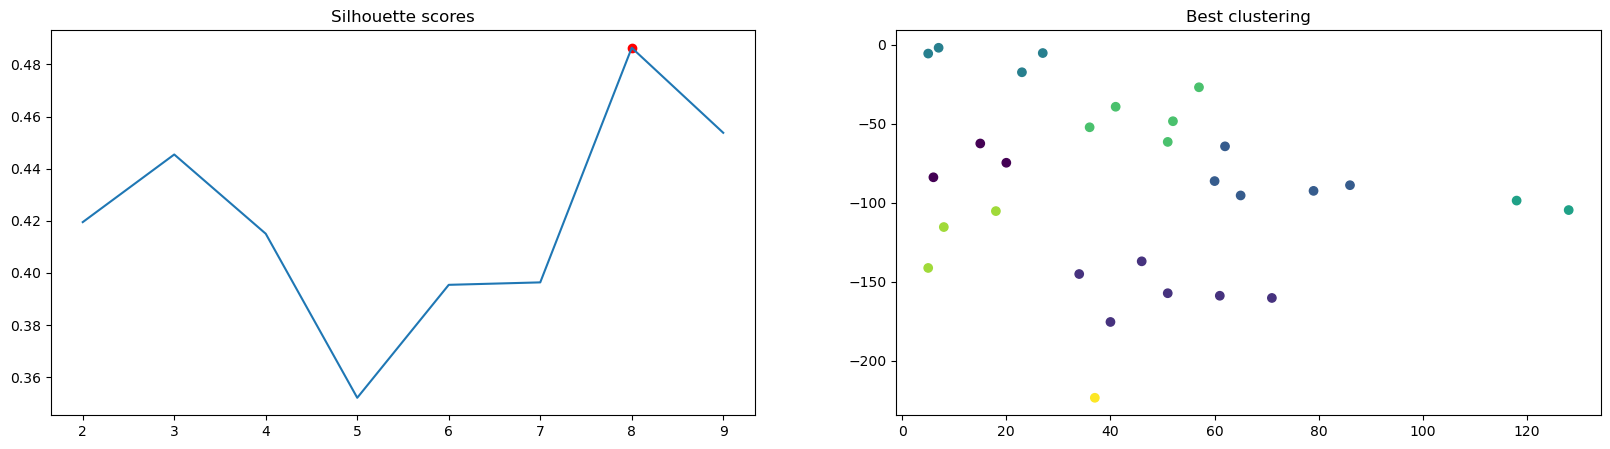

In [87]:
data = X.values
model_class = KMeans
param = {'random_state': 21}
param_name = 'n_clusters'
param_range = range(2, 10)

clustering_visualizes(data, model_class, param, param_name, param_range)